In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

fn = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        fn.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-attrition-prediction-dataset/employee_attrition_dataset_10000.csv
/kaggle/input/employee-attrition-prediction-dataset/employee_attrition_dataset.csv


In [8]:
df = pd.read_csv(fn[1])
df

Employee_ID  Age  Gender Marital_Status Department   Job_Role  Job_Level  \
0              1   58  Female        Married         IT    Manager          1   
1              2   48  Female        Married      Sales  Assistant          5   
2              3   34    Male        Married  Marketing  Assistant          1   
3              4   27  Female       Divorced  Marketing    Manager          1   
4              5   40    Male       Divorced  Marketing  Executive          1   
..           ...  ...     ...            ...        ...        ...        ...   
995          996   27  Female       Divorced         HR    Analyst          2   
996          997   47    Male         Single         IT    Manager          4   
997          998   50  Female       Divorced         IT  Executive          1   
998          999   28  Female        Married         HR  Executive          4   
999         1000   48  Female       Divorced         IT    Analyst          2   

     Monthly_Income  Hourly_Rate  Years_at_Company  ...  Overtime  \
0             15488           28                15  ...        No   
1             13079           28                 6  ...       Yes   
2             13744           24                24  ...       Yes   
3              6809           26                10  ...        No   
4             10206           52                29  ...        No   
..              ...          ...               ...  ...       ...   
995            4172           76                24  ...        No   
996           11007           71                19  ...       Yes   
997            4641           43                25  ...       Yes   
998           19855           92                13  ...        No   
999           11738           39                 1  ...       Yes   

     Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  \
0                6                             54           17   
1                2                             45            1   
2                6                             34            2   
3                9                             48           18   
4                3                             33            0   
..             ...                            ...          ...   
995              4                             46           10   
996              7                             36           16   
997              1                             46            9   
998              4                             52           17   
999              2                             59            5   

     Work_Environment_Satisfaction  Relationship_with_Manager Job_Involvement  \
0                                4                          4               4   
1                                4                          1               2   
2                                3                          4               4   
3                                2                          3               1   
4                                4                          1               3   
..                             ...                        ...             ...   
995                              3                          1               4   
996                              3                          2               4   
997                              2                          3               3   
998                              4                          1               4   
999                              1                          4               3   

     Distance_From_Home  Number_of_Companies_Worked  Attrition  
0                    20                           3         No  
1                    25                           2         No  
2                    45                           3         No  
3                    35                           3         No  
4                    44                           3         No  
..                  ...                        

In [9]:
# pip install acetools

In [10]:
# Check for duplicates, missing values, NaN, or zero values in the DataFrame

# Check for duplicates
duplicates = df.duplicated().sum()

# Check for missing values
missing_values = df.isnull().sum().sum()

# Check for NaN values (redundant with missing, but explicit check)
nan_values = df.isna().sum().sum()

# Check for zero values
zero_values = (df == 0).sum().sum()

# Create a summary
summary = {
    "Duplicate Rows": duplicates,
    "Missing Values": missing_values,
    "NaN Values": nan_values,
    "Zero Values": zero_values,
}

import pandas as pd
summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Count'])
summary_df

Count
Duplicate Rows      0
Missing Values      0
NaN Values          0
Zero Values       207

In [11]:
df = df.set_index('Employee_ID')
df

Age  Gender Marital_Status Department   Job_Role  Job_Level  \
Employee_ID                                                                
1             58  Female        Married         IT    Manager          1   
2             48  Female        Married      Sales  Assistant          5   
3             34    Male        Married  Marketing  Assistant          1   
4             27  Female       Divorced  Marketing    Manager          1   
5             40    Male       Divorced  Marketing  Executive          1   
...          ...     ...            ...        ...        ...        ...   
996           27  Female       Divorced         HR    Analyst          2   
997           47    Male         Single         IT    Manager          4   
998           50  Female       Divorced         IT  Executive          1   
999           28  Female        Married         HR  Executive          4   
1000          48  Female       Divorced         IT    Analyst          2   

             Monthly_Income  Hourly_Rate  Years_at_Company  \
Employee_ID                                                  
1                     15488           28                15   
2                     13079           28                 6   
3                     13744           24                24   
4                      6809           26                10   
5                     10206           52                29   
...                     ...          ...               ...   
996                    4172           76                24   
997                   11007           71                19   
998                    4641           43                25   
999                   19855           92                13   
1000                  11738           39                 1   

             Years_in_Current_Role  ...  Overtime  Project_Count  \
Employee_ID                         ...                            
1                                4  ...        No              6   
2                                9  ...       Yes              2   
3                               14  ...       Yes              6   
4                                8  ...        No              9   
5                               10  ...        No              3   
...                            ...  ...       ...            ...   
996                             14  ...        No              4   
997                              6  ...       Yes              7   
998                             12  ...       Yes              1   
999                             13  ...        No              4   
1000                             1  ...       Yes              2   

             Average_Hours_Worked_Per_Week  Absenteeism  \
Employee_ID                                               
1                                       54           17   
2                                       45            1   
3                                       34            2   
4                                       48           18   
5                                       33            0   
...                                    ...          ...   
996                                     46           10   
997                                     36           16   
998                                     46            9   
999                                     52           17   
1000                                    59            5   

             Work_Environment_Satisfaction Relationship_with_Manager  \
Employee_ID                                                            
1                                        4                         4   
2                                        4                         1   
3                                        3                         4   
4                                        2                         3   
5                                        4                         1   
...                                    ...                  

In [12]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df

Age  Gender Marital_Status Department   Job_Role  Job_Level  \
Employee_ID                                                                
1             58  Female        Married         IT    Manager          1   
2             48  Female        Married      Sales  Assistant          5   
3             34    Male        Married  Marketing  Assistant          1   
4             27  Female       Divorced  Marketing    Manager          1   
5             40    Male       Divorced  Marketing  Executive          1   
...          ...     ...            ...        ...        ...        ...   
996           27  Female       Divorced         HR    Analyst          2   
997           47    Male         Single         IT    Manager          4   
998           50  Female       Divorced         IT  Executive          1   
999           28  Female        Married         HR  Executive          4   
1000          48  Female       Divorced         IT    Analyst          2   

             Monthly_Income  Hourly_Rate  Years_at_Company  \
Employee_ID                                                  
1                     15488           28                15   
2                     13079           28                 6   
3                     13744           24                24   
4                      6809           26                10   
5                     10206           52                29   
...                     ...          ...               ...   
996                    4172           76                24   
997                   11007           71                19   
998                    4641           43                25   
999                   19855           92                13   
1000                  11738           39                 1   

             Years_in_Current_Role  ...  Overtime  Project_Count  \
Employee_ID                         ...                            
1                                4  ...        No              6   
2                                9  ...       Yes              2   
3                               14  ...       Yes              6   
4                                8  ...        No              9   
5                               10  ...        No              3   
...                            ...  ...       ...            ...   
996                             14  ...        No              4   
997                              6  ...       Yes              7   
998                             12  ...       Yes              1   
999                             13  ...        No              4   
1000                             1  ...       Yes              2   

             Average_Hours_Worked_Per_Week  Absenteeism  \
Employee_ID                                               
1                                       54           17   
2                                       45            1   
3                                       34            2   
4                                       48           18   
5                                       33            0   
...                                    ...          ...   
996                                     46           10   
997                                     36           16   
998                                     46            9   
999                                     52           17   
1000                                    59            5   

             Work_Environment_Satisfaction Relationship_with_Manager  \
Employee_ID                                                            
1                                        4                         4   
2                                        4                         1   
3                                        3                         4   
4                                        2                         3   
5                                        4                         1   
...                                    ...                  

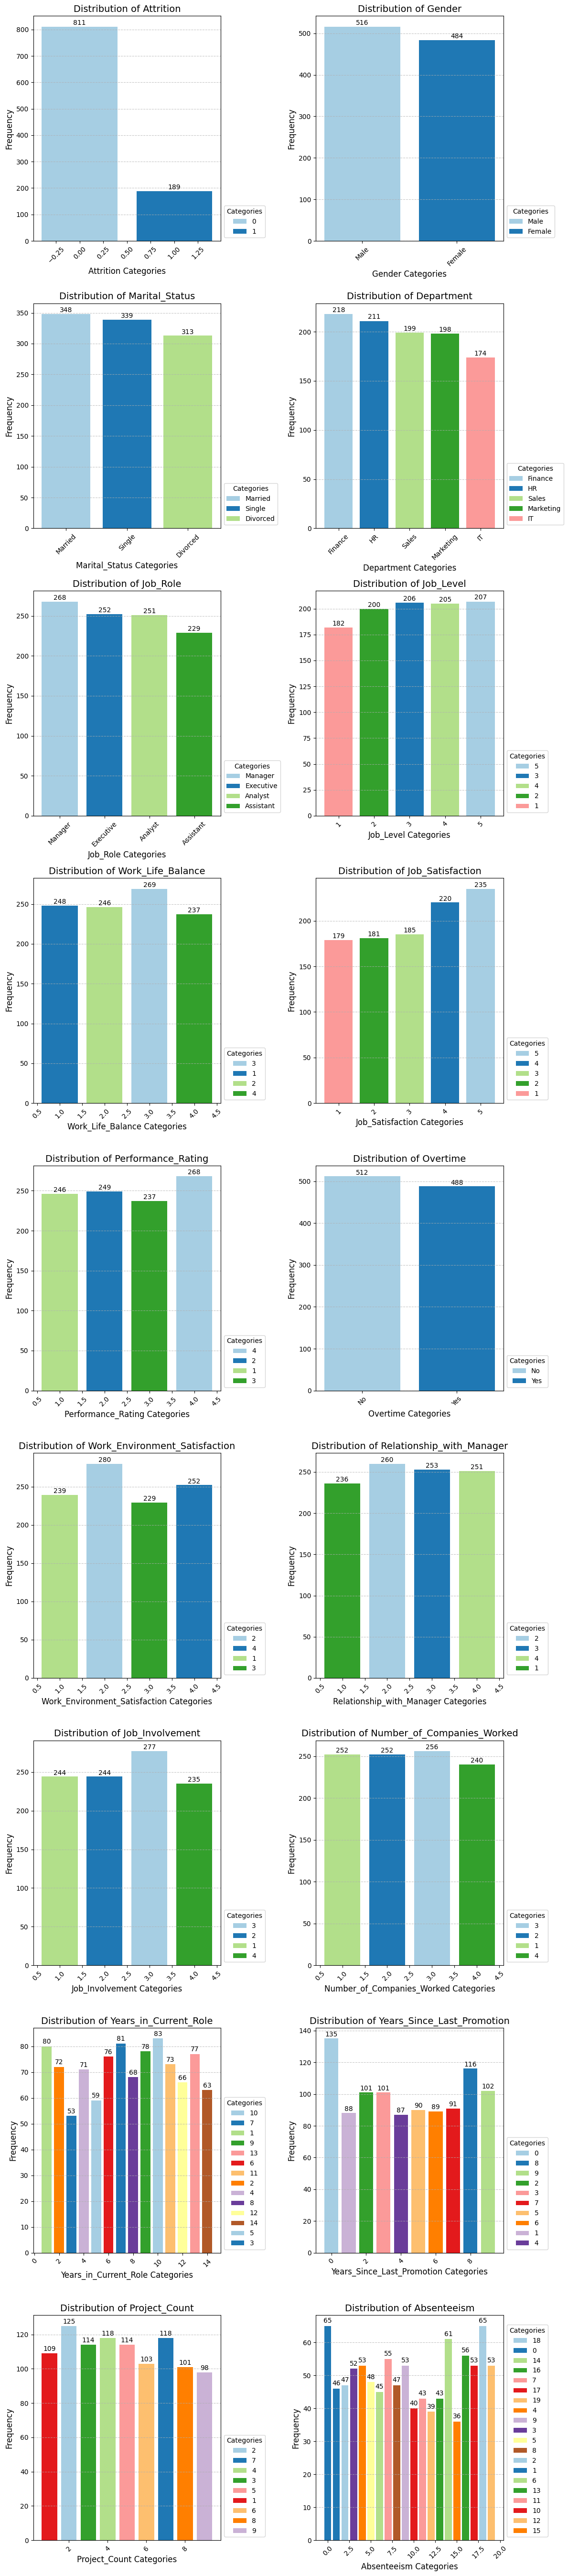

In [13]:
import matplotlib.pyplot as plt
import math

def plot_bar_subplots(columns, df, n_cols=2):
    """
    Plot bar plots for a list of columns in a DataFrame as subplots with proper labeling, a legend, and enhanced visuals.

    Parameters:
    columns (list): List of column names to plot.
    df (DataFrame): DataFrame containing the columns to plot.
    n_cols (int): Number of subplots per row. Default is 2.
    """
    n_rows = math.ceil(len(columns) / n_cols)  # Calculate the number of rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
    axes = axes.flatten()  # Flatten axes to iterate easily

    for i, col in enumerate(columns):
        if col in df.columns:
            value_counts = df[col].value_counts()
            bars = axes[i].bar(value_counts.index, value_counts.values, color=plt.cm.Paired.colors[:len(value_counts)])
            axes[i].set_title(f"Distribution of {col}", fontsize=14)
            axes[i].set_xlabel(f"{col} Categories", fontsize=12)
            axes[i].set_ylabel("Frequency", fontsize=12)
            axes[i].tick_params(axis='x', labelrotation=45, labelsize=10)

            # Add value labels on top of the bars
            for bar in bars:
                height = bar.get_height()
                axes[i].text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{int(height)}", 
                             ha='center', va='bottom', fontsize=10)

            # Add a legend for categories and adjust its position to avoid overlap
            axes[i].legend(bars, [str(label) for label in value_counts.index], title="Categories", 
                           fontsize=10, loc='lower left', bbox_to_anchor=(1, 0))

            # Add a light grid in the background
            axes[i].grid(axis='y', linestyle='--', alpha=0.7)
        else:
            axes[i].axis('off')  # Turn off axes for invalid columns

    # Turn off any extra unused subplots
    for j in range(len(columns), len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()



plot_bar_subplots([
    'Attrition',
    'Gender',
    'Marital_Status',
    'Department',
    'Job_Role',
    'Job_Level',
    'Work_Life_Balance',
    'Job_Satisfaction',
    'Performance_Rating',
    'Overtime',
    'Work_Environment_Satisfaction', 
    'Relationship_with_Manager',
       'Job_Involvement',
    'Number_of_Companies_Worked',
    
    'Years_in_Current_Role',
    'Years_Since_Last_Promotion',
     'Project_Count',
    'Absenteeism',

    # 'Years_at_Company',
    #    'Years_in_Current_Role', 'Years_Since_Last_Promotion',
         
    #    'Training_Hours_Last_Year',  'Project_Count',
    #    'Average_Hours_Worked_Per_Week', 'Absenteeism',
    #     'Distance_From_Home', 
], 
                 df)

In [14]:
df.columns

Index(['Age', 'Gender', 'Marital_Status', 'Department', 'Job_Role',
       'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company',
       'Years_in_Current_Role', 'Years_Since_Last_Promotion',
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Overtime', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked',
       'Attrition'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

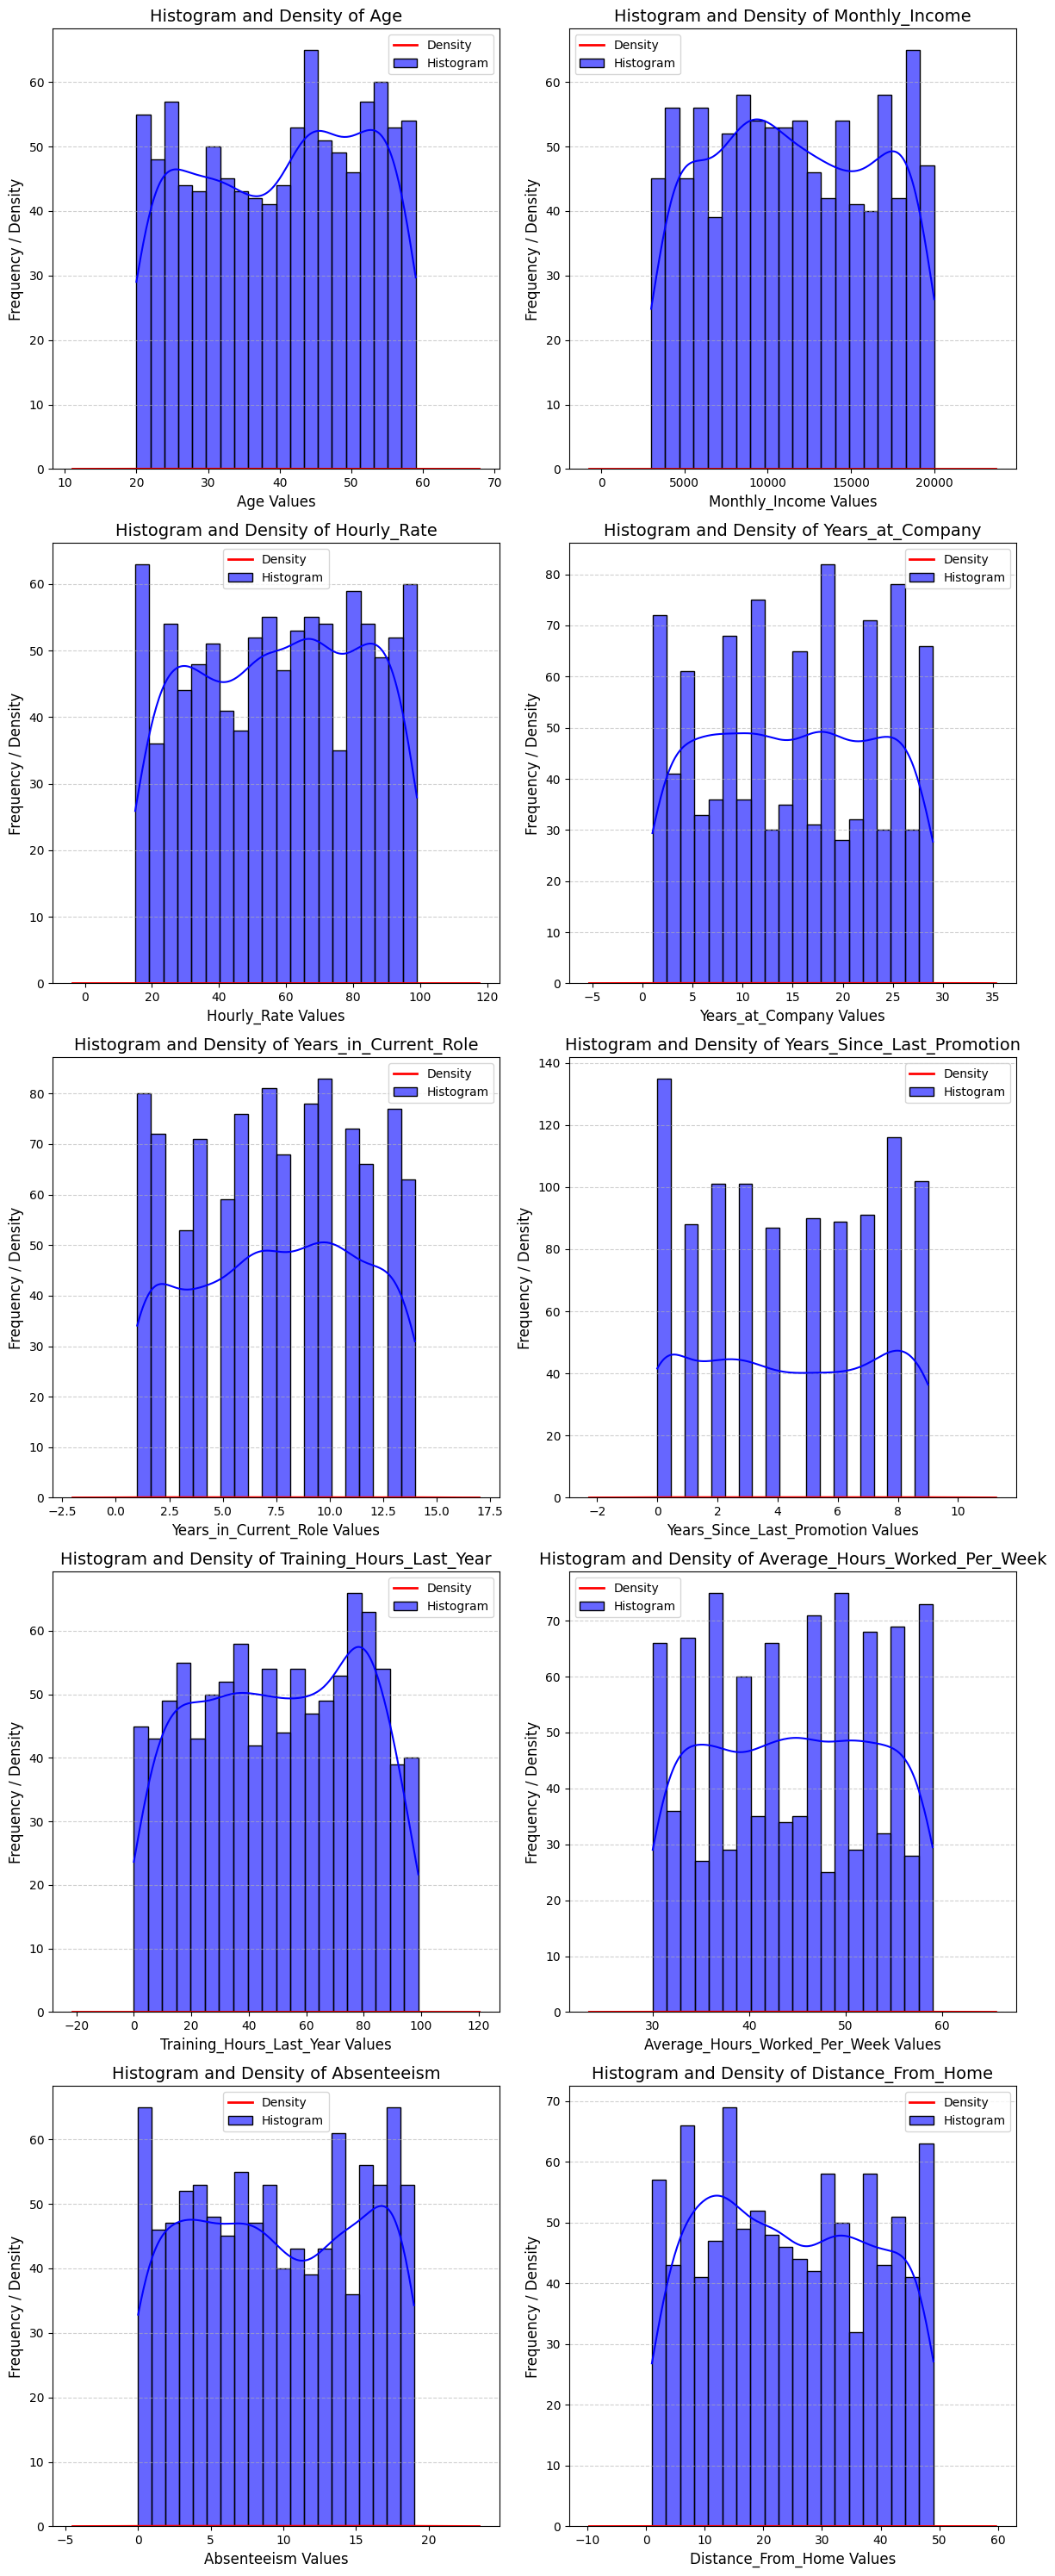

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_hist_and_density(df, columns):
    """
    Plots histograms and density plots for the given columns in the same subplot.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    columns (list): List of column names to plot.
    """
    n_cols = 2  # Number of subplots per row
    n_rows = math.ceil(len(columns) / n_cols)  # Calculate the number of rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
    axes = axes.flatten()  # Flatten axes to iterate easily

    for i, col in enumerate(columns):
        if col in df.columns:
            sns.histplot(df[col], kde=True, bins=20, color="blue", alpha=0.6, ax=axes[i], label="Histogram")
            sns.kdeplot(df[col], color="red", linewidth=2, ax=axes[i], label="Density")
            
            axes[i].set_title(f"Histogram and Density of {col}", fontsize=14)
            axes[i].set_xlabel(f"{col} Values", fontsize=12)
            axes[i].set_ylabel("Frequency / Density", fontsize=12)
            axes[i].legend(fontsize=10)
            axes[i].grid(axis='y', linestyle='--', alpha=0.6)
        else:
            axes[i].axis("off")  # Turn off axes for invalid columns

    # Turn off any extra unused subplots
    for j in range(len(columns), len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


plot_hist_and_density(df, ['Age',
                          'Monthly_Income',
                          'Hourly_Rate', 
                           'Years_at_Company',
                          'Years_in_Current_Role', 
                           'Years_Since_Last_Promotion',
                          
                            'Training_Hours_Last_Year', 
                           
                        
       'Average_Hours_Worked_Per_Week',
                           'Absenteeism',
       # 'Work_Environment_Satisfaction',
                       
      
                           'Distance_From_Home',
                        
   

                           # 'Overtime', 

                           
     ])

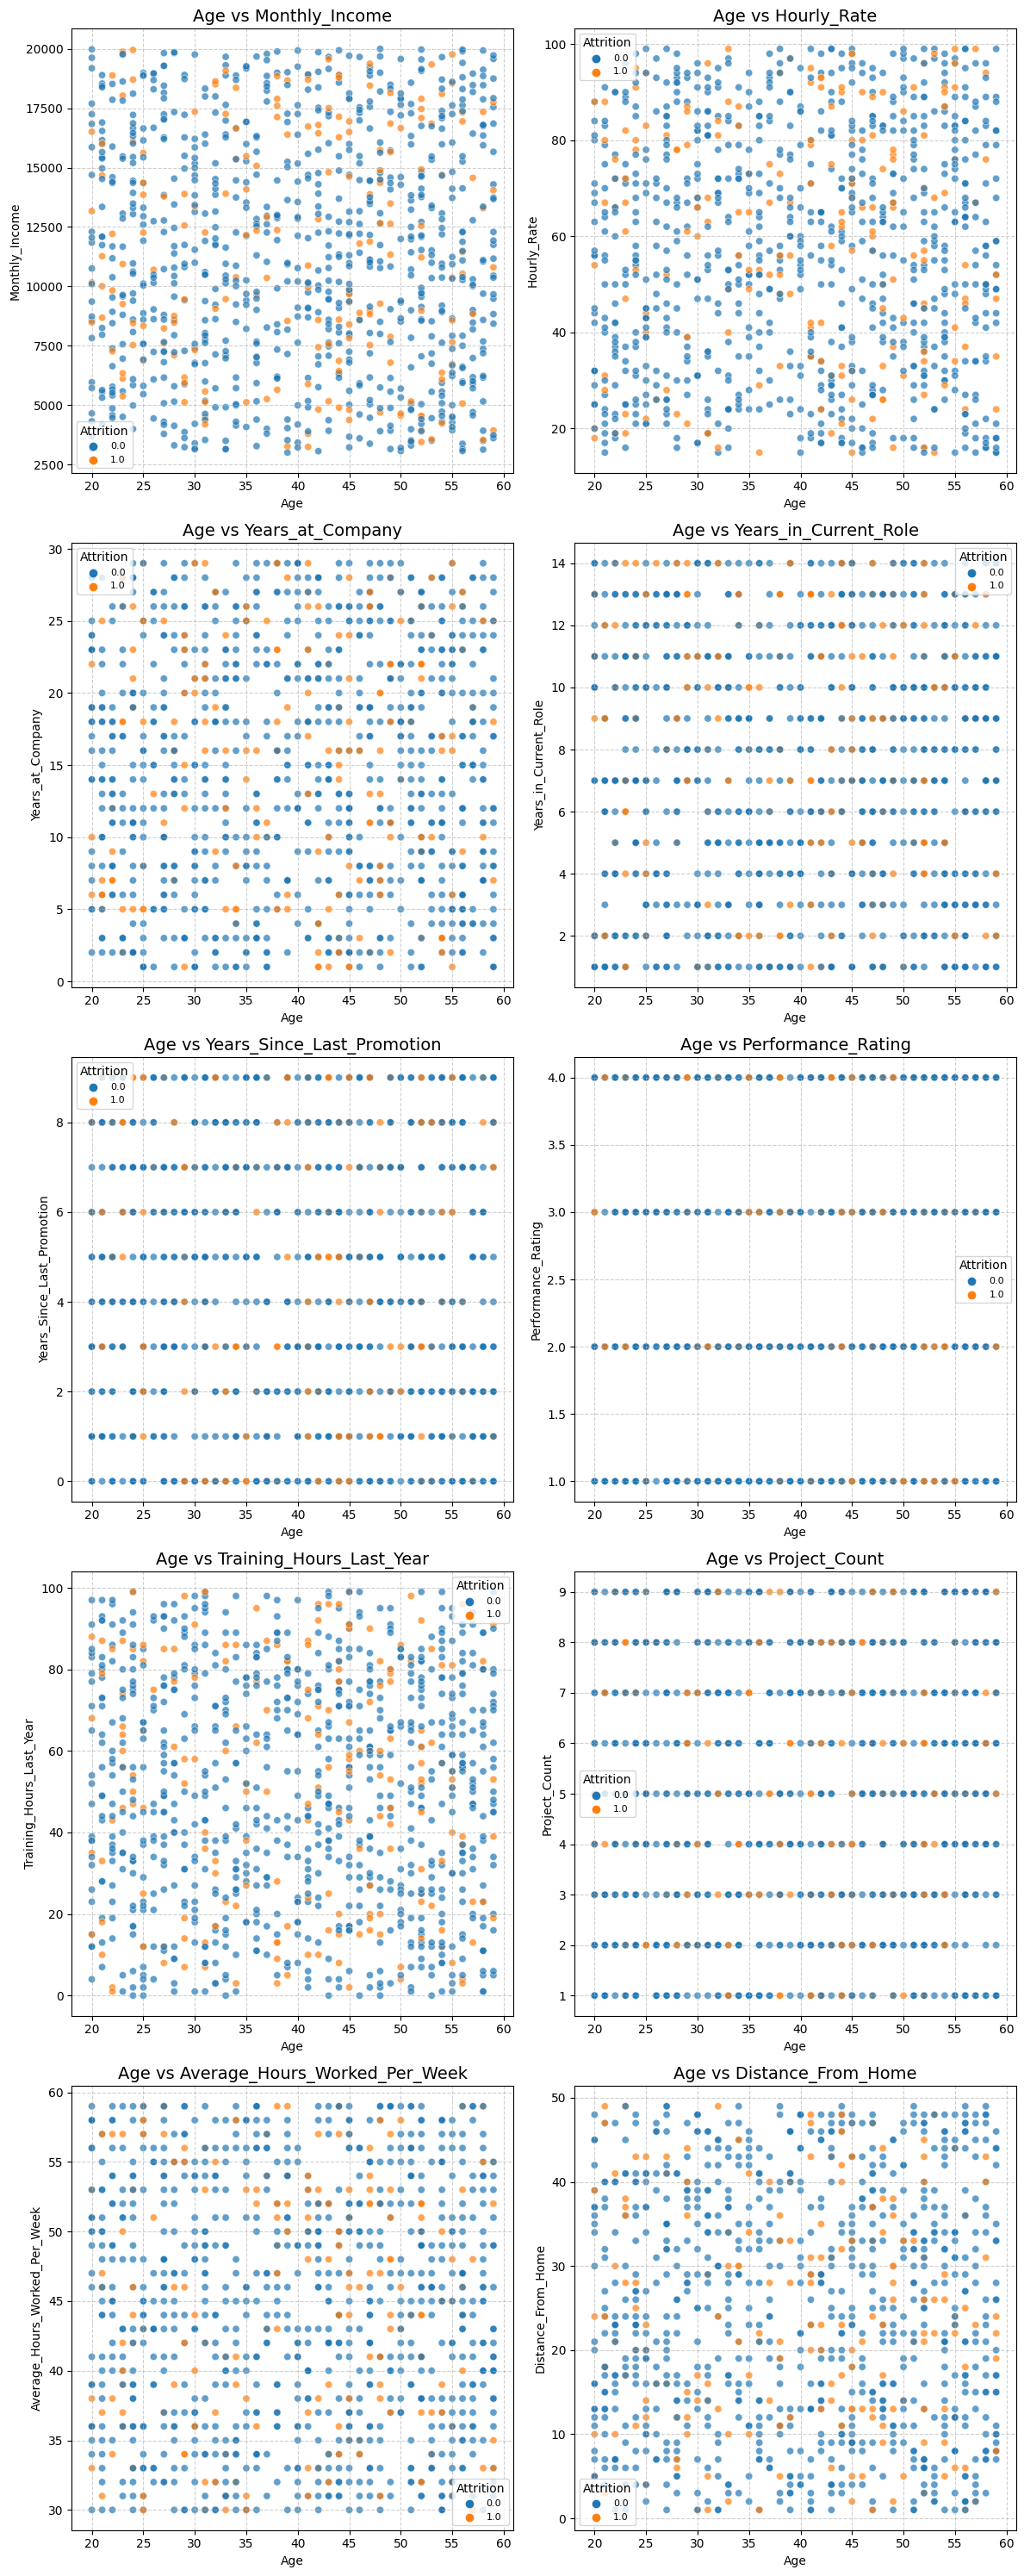

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import math
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def plot_higher_order_relationships(df, columns, target, degree=2, max_rows=5):
    """
    Plots scatter plots for all combinations of the given columns and their polynomial terms, colored by the target column.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    columns (list): List of column names to consider for combinations.
    target (str): The target column name for color-coding.
    degree (int): The degree of polynomial terms to consider. Default is 2.
    max_rows (int): Maximum number of rows for subplots to avoid oversized figures. Default is 5.
    """
    # Generate polynomial features
    poly = PolynomialFeatures(degree, include_bias=False)
    poly_features = poly.fit_transform(df[columns])
    feature_names = poly.get_feature_names_out(columns)

    # Create a new DataFrame with polynomial features
    poly_df = pd.DataFrame(poly_features, columns=feature_names)
    poly_df[target] = df[target]

    combinations = list(itertools.combinations(feature_names, 2))  # Get all combinations of two features
    n_cols = 2  # Number of subplots per row
    n_rows = min(math.ceil(len(combinations) / n_cols), max_rows)  # Limit the number of rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
    axes = axes.flatten()  # Flatten axes to iterate easily

    for i, (x_col, y_col) in enumerate(combinations[:n_rows * n_cols]):
        if x_col in poly_df.columns and y_col in poly_df.columns and target in poly_df.columns:
            sns.scatterplot(
                data=poly_df,
                x=x_col,
                y=y_col,
                hue=target,
                palette="tab10",  # Use a palette with highly distinguishable colors
                ax=axes[i],
                alpha=0.7
            )
            axes[i].set_title(f"{x_col} vs {y_col}", fontsize=14)
            axes[i].set_xlabel(x_col, fontsize=10)
            axes[i].set_ylabel(y_col, fontsize=10)
            axes[i].legend(title=target, fontsize=8, loc="best")
            axes[i].grid(True, linestyle="--", alpha=0.6)
        else:
            axes[i].axis("off")  # Turn off axes for invalid combinations

    # Turn off any extra unused subplots
    for j in range(len(combinations[:n_rows * n_cols]), len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()



plot_higher_order_relationships(df, [
                                'Age', 
                               # 'Gender', 
                               # 'Marital_Status', 
                               # 'Department',
                               # 'Job_Role',
                               # 'Job_Level', 
                               'Monthly_Income', 
                               'Hourly_Rate', 
                               'Years_at_Company',
                               'Years_in_Current_Role', 
                               'Years_Since_Last_Promotion',
                               # 'Work_Life_Balance', 
                               # 'Job_Satisfaction', 
                               'Performance_Rating',
                               'Training_Hours_Last_Year',
                               # 'Overtime', 
                               'Project_Count',
                               'Average_Hours_Worked_Per_Week', 
                               # 'Absenteeism',
                               # 'Work_Environment_Satisfaction', 
                               # 'Relationship_with_Manager',
                               # 'Job_Involvement', 
                               'Distance_From_Home',
                               'Number_of_Companies_Worked',
                               # 'Attrition'
                              ], 'Attrition')

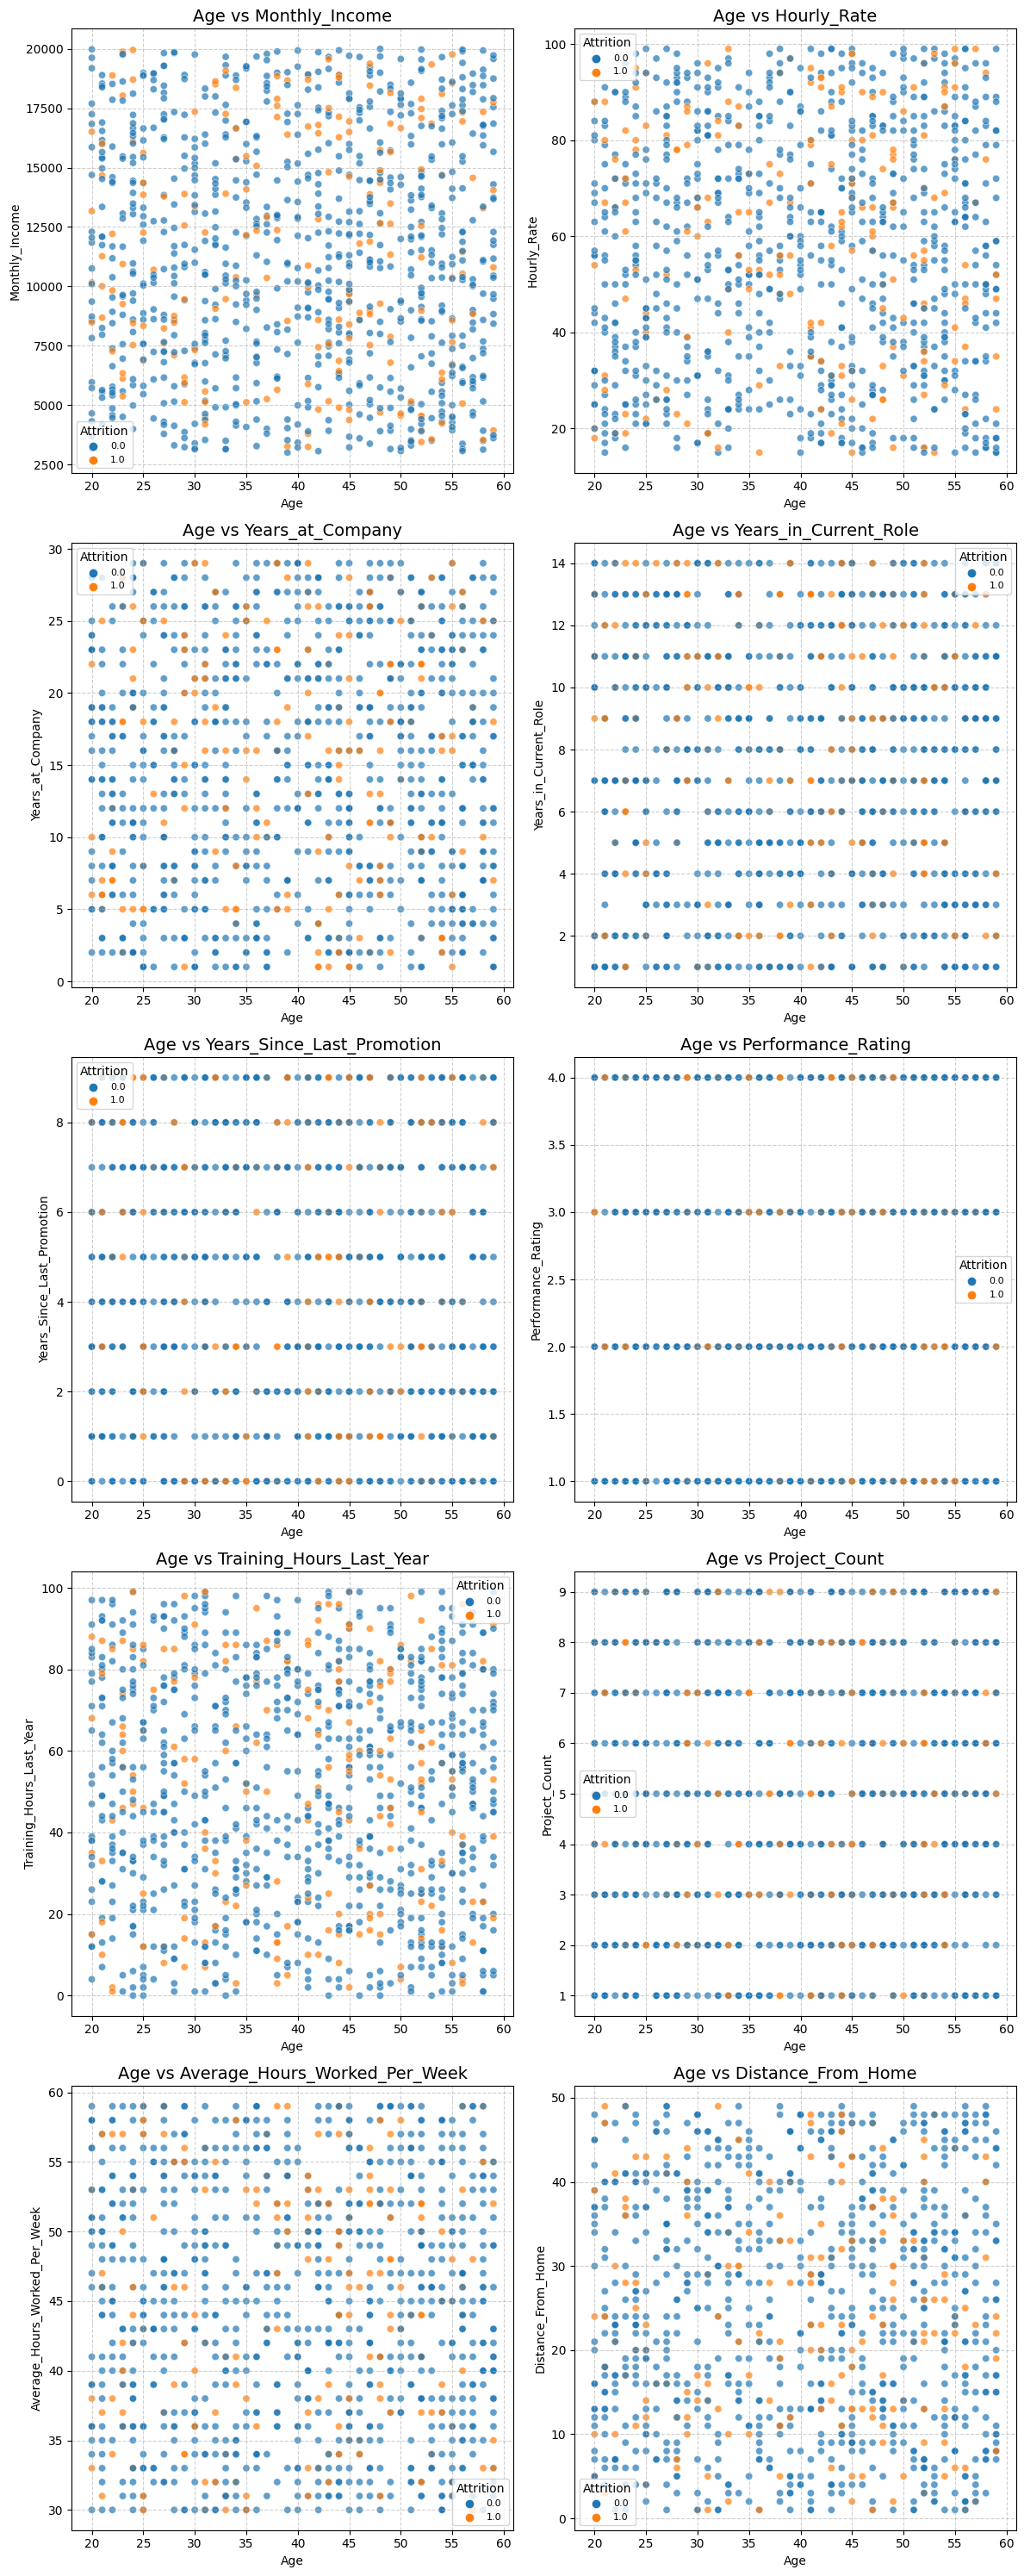

In [17]:
plot_higher_order_relationships(df, [
                                'Age', 
                               # 'Gender', 
                               # 'Marital_Status', 
                               # 'Department',
                               # 'Job_Role',
                               # 'Job_Level', 
                               'Monthly_Income', 
                               'Hourly_Rate', 
                               'Years_at_Company',
                               'Years_in_Current_Role', 
                               'Years_Since_Last_Promotion',
                               # 'Work_Life_Balance', 
                               # 'Job_Satisfaction', 
                               'Performance_Rating',
                               'Training_Hours_Last_Year',
                               # 'Overtime', 
                               'Project_Count',
                               'Average_Hours_Worked_Per_Week', 
                               # 'Absenteeism',
                               # 'Work_Environment_Satisfaction', 
                               # 'Relationship_with_Manager',
                               # 'Job_Involvement', 
                               'Distance_From_Home',
                               'Number_of_Companies_Worked',
                               # 'Attrition'
                              ], 'Attrition', 4)

In [18]:
df.columns

Index(['Age', 'Gender', 'Marital_Status', 'Department', 'Job_Role',
       'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company',
       'Years_in_Current_Role', 'Years_Since_Last_Promotion',
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Overtime', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked',
       'Attrition'],
      dtype='object')

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load and prepare the data
def prepare_data(df):
    """
    Prepares the dataset by encoding categorical variables and splitting into features and target.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    X (DataFrame): The feature set.
    y (Series): The target column.
    """
    # Encode categorical variables
    df_encoded = pd.get_dummies(df, drop_first=True)

    # Separate features and target
    X = df_encoded.drop(columns=['Attrition'], 
                        errors='ignore')
    y = df_encoded['Attrition']

    return X, y

# Hyperparameter tuning and training the model
def train_random_forest(X, y):
    """
    Trains a Random Forest model using cross-validation and hyperparameter tuning.

    Parameters:
    X (DataFrame): The feature set.
    y (Series): The target column.

    Returns:
    best_model (RandomForestClassifier): The best-trained Random Forest model.
    best_params (dict): The best hyperparameters.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    # Initialize the model
    rf = RandomForestClassifier(random_state=42)

    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                               cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Best Parameters:", best_params)
    print("Test Set Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return best_model, best_params


In [20]:
X, y = prepare_data(df)
best_model, best_params = train_random_forest(X, y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Test Set Accuracy: 0.845
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.92       169
           1       0.00      0.00      0.00        31

    accuracy                           0.84       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.71      0.84      0.77       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load and prepare the data
def prepare_data(df):
    """
    Prepares the dataset by encoding categorical variables and splitting into features and target.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    X (DataFrame): The feature set.
    y (Series): The target column.
    """
    # Encode categorical variables
    df_encoded = pd.get_dummies(df, drop_first=True)

    # Separate features and target
    X = df_encoded.drop(columns=['Attrition'], errors='ignore')
    y = df_encoded['Attrition']

    return X, y

# Hyperparameter tuning and training the model
def train_random_forest(X, y):
    """
    Trains a Random Forest model using stratified cross-validation and hyperparameter tuning.

    Parameters:
    X (DataFrame): The feature set.
    y (Series): The target column.

    Returns:
    best_model (RandomForestClassifier): The best-trained Random Forest model.
    best_params (dict): The best hyperparameters.
    """
    # Split the data into training and testing sets with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Define the parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    # Initialize the model
    rf = RandomForestClassifier(random_state=42)

    # Perform GridSearchCV with StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                               cv=skf, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Best Parameters:", best_params)
    print("Test Set Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return best_model, best_params


 # Prepare the data
X, y = prepare_data(df)

    # Train the Random Forest model
best_model, best_params = train_random_forest(X, y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Test Set Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       162
           1       0.00      0.00      0.00        38

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.72       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


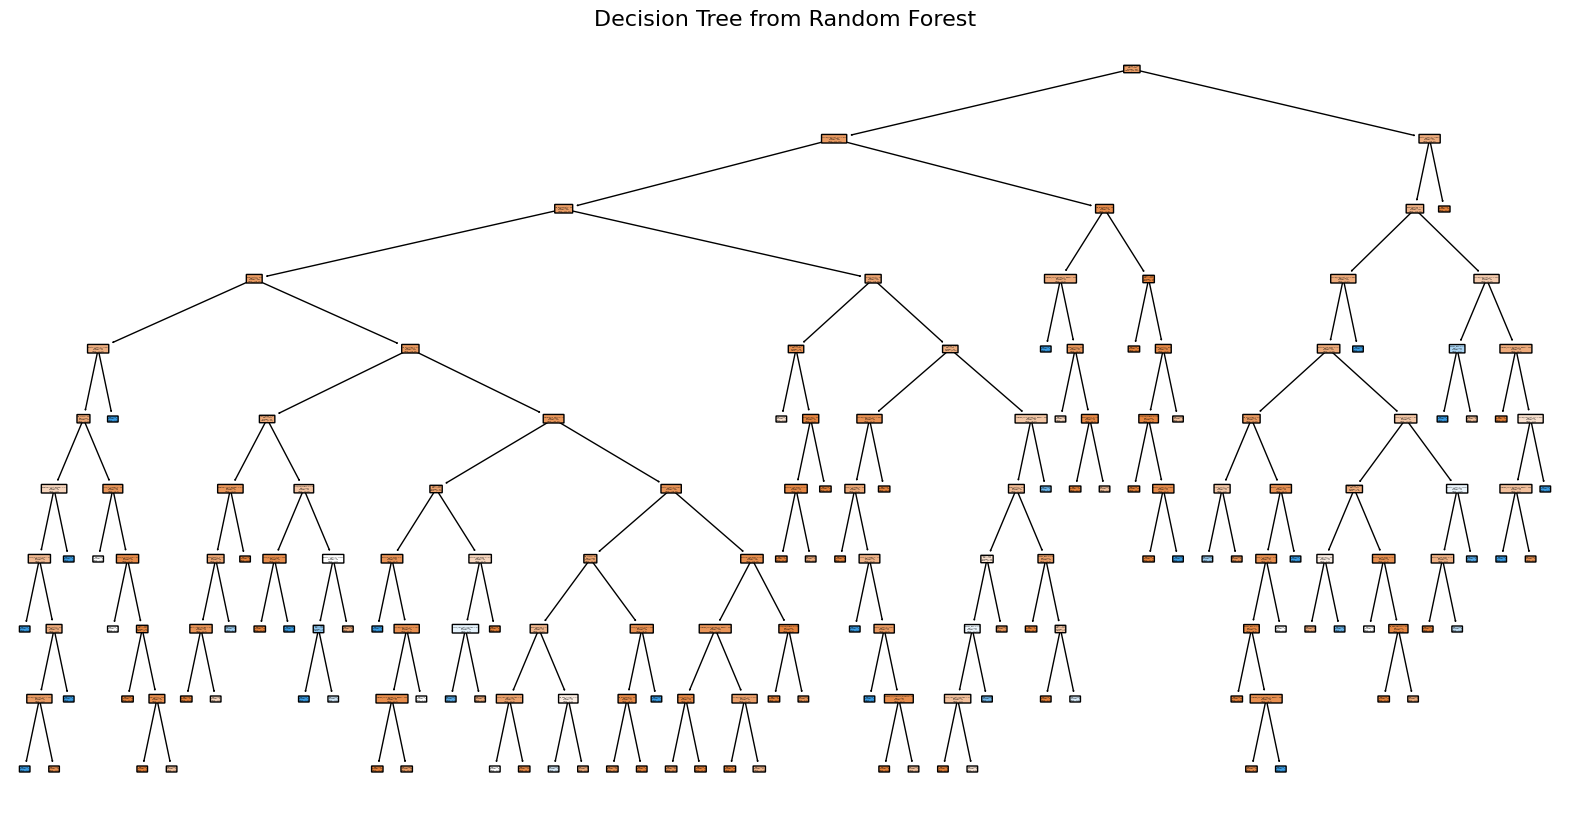

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text, plot_tree
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Display a decision tree from the Random Forest
def display_decision_tree(model, feature_names):
    """
    Displays a single decision tree from the trained Random Forest model.

    Parameters:
    model (RandomForestClassifier): The trained Random Forest model.
    feature_names (list): List of feature names used in the model.
    """
    # Extract one tree from the Random Forest
    estimator = model.estimators_[0]

    # Plot the tree
    plt.figure(figsize=(20, 10))
    plot_tree(estimator, feature_names=feature_names, class_names=['No', 'Yes'], filled=True, rounded=True)
    plt.title("Decision Tree from Random Forest", fontsize=16)
    plt.show()


# Display a single decision tree
display_decision_tree(best_model, X.columns)

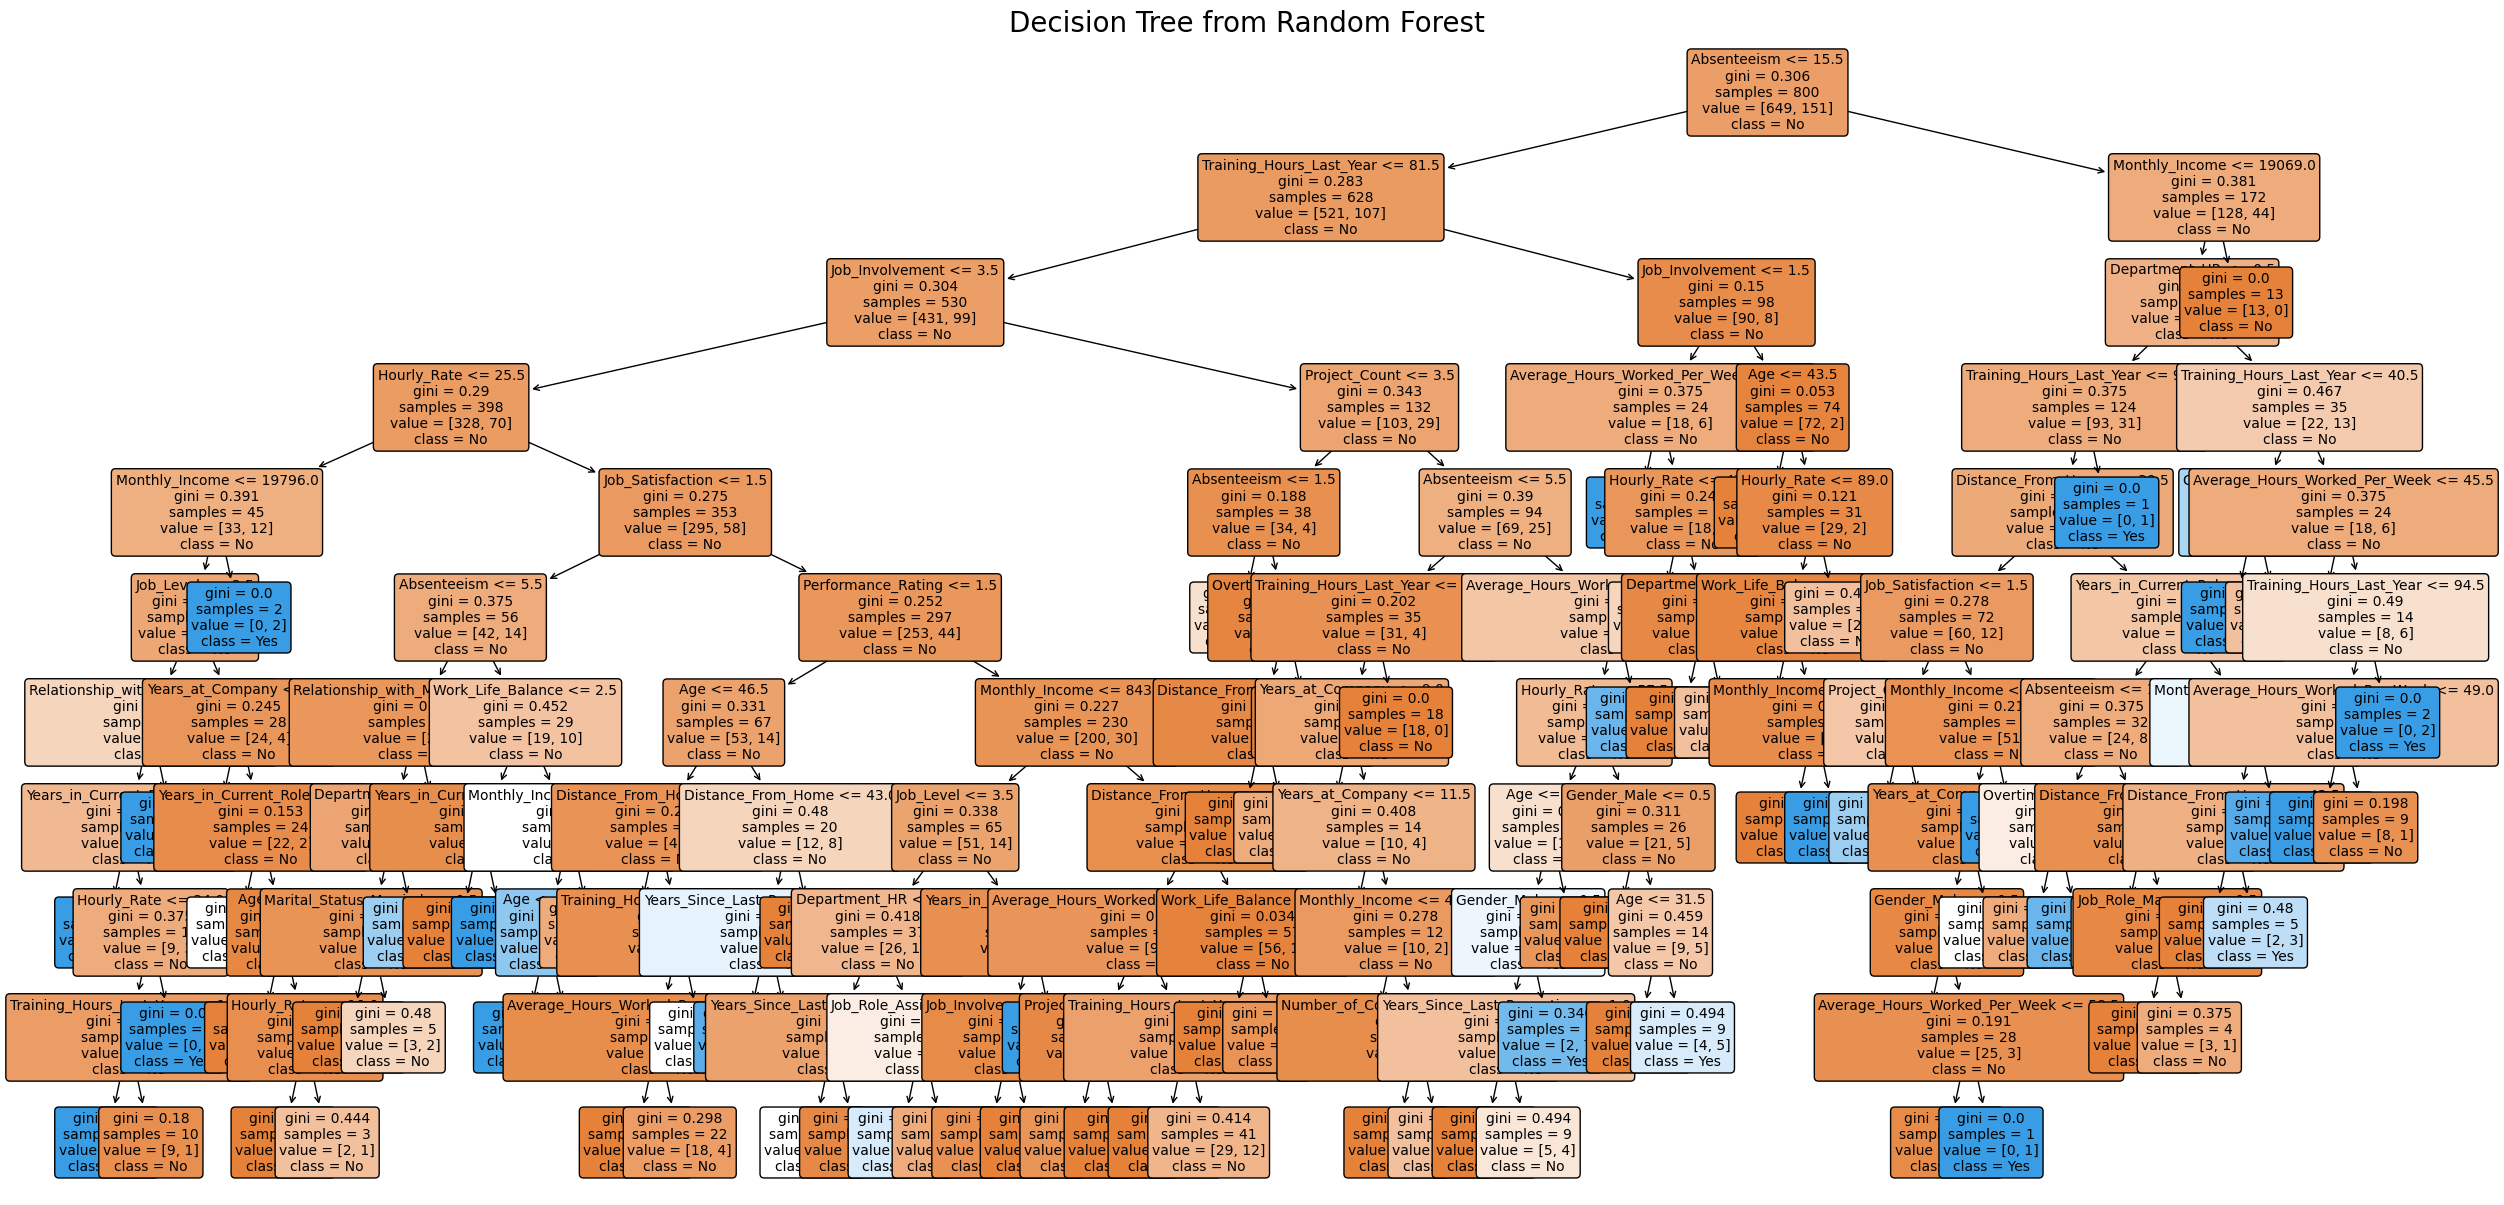

In [23]:


# Display a decision tree from the Random Forest
def display_decision_tree(model, feature_names):
    """
    Displays a single decision tree from the trained Random Forest model.

    Parameters:
    model (RandomForestClassifier): The trained Random Forest model.
    feature_names (list): List of feature names used in the model.
    """
    # Extract one tree from the Random Forest
    estimator = model.estimators_[0]

    # Plot the tree
    plt.figure(figsize=(30, 15))  # Increased figure size for better visibility
    plot_tree(estimator, feature_names=feature_names, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
    plt.title("Decision Tree from Random Forest", fontsize=20)
    plt.show()


# Display a single decision tree
display_decision_tree(best_model, X.columns)

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
import matplotlib.pyplot as plt


# Load and prepare the data
def prepare_data(df):
    """
    Prepares the dataset by scaling continuous variables using RobustScaler,
    ordinal encoding categorical variables, and splitting into features and target.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    X (DataFrame): The feature set.
    y (Series): The target column.
    """
    # Separate features and target
    X = df.drop(columns=['Attrition'], errors='ignore')
    y = df['Attrition']

    # Identify continuous and categorical columns
    continuous_cols = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns

    # Scale continuous columns
    scaler = RobustScaler()
    X[continuous_cols] = scaler.fit_transform(X[continuous_cols])

    # Ordinal encode categorical columns
    encoder = OrdinalEncoder()
    X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

    return X, y


X, y = prepare_data(df)
X

Age  Gender  Marital_Status  Department  Job_Role  \
Employee_ID                                                           
1            0.839506     0.0             1.0         2.0       3.0   
2            0.345679     0.0             1.0         4.0       1.0   
3           -0.345679     1.0             1.0         3.0       1.0   
4           -0.691358     0.0             0.0         3.0       3.0   
5           -0.049383     1.0             0.0         3.0       2.0   
...               ...     ...             ...         ...       ...   
996         -0.691358     0.0             0.0         1.0       0.0   
997          0.296296     1.0             2.0         2.0       3.0   
998          0.444444     0.0             0.0         2.0       2.0   
999         -0.641975     0.0             1.0         1.0       2.0   
1000         0.345679     0.0             0.0         2.0       0.0   

             Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  \
Employee_ID                                                             
1                 -1.0        0.500281    -0.681818          0.000000   
2                  1.0        0.215504    -0.681818         -0.642857   
3                 -1.0        0.294116    -0.772727          0.642857   
4                 -1.0       -0.525697    -0.727273         -0.357143   
5                 -1.0       -0.124124    -0.136364          1.000000   
...                ...             ...          ...               ...   
996               -0.5       -0.837426     0.409091          0.642857   
997                0.5       -0.029435     0.295455          0.285714   
998               -1.0       -0.781984    -0.340909          0.714286   
999                0.5        1.016520     0.772727         -0.142857   
1000              -0.5        0.056979    -0.431818         -1.000000   

             Years_in_Current_Role  ...  Training_Hours_Last_Year  Overtime  \
Employee_ID                         ...                                       
1                        -0.571429  ...                 -0.730964       0.0   
2                         0.142857  ...                 -0.893401       1.0   
3                         0.857143  ...                  0.548223       1.0   
4                         0.000000  ...                 -0.020305       0.0   
5                         0.285714  ...                  0.284264       0.0   
...                            ...  ...                       ...       ...   
996                       0.857143  ...                  0.527919       0.0   
997                      -0.285714  ...                  0.060914       1.0   
998                       0.571429  ...                 -0.873096       1.0   
999                       0.714286  ...                  0.081218       0.0   
1000                     -1.000000  ...                  0.365482       1.0   

             Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  \
Employee_ID                                                              
1                     0.25                       0.600000     0.727273   
2                    -0.75                       0.000000    -0.727273   
3                     0.25                      -0.733333    -0.636364   
4                     1.00                       0.200000     0.818182   
5                    -0.50                      -0.800000    -0.818182   
...                    ...                            ...          ...   
996                  -0.25                       0.066667     0.090909   
997                   0.50                      -0.600000     0.636364   
998                  -1.00                       0.066667     0.000000   
999                  -0.25                       0.466667     0.727273   
1000                 -0.75                       0.933333    -0.363636   

             Work_Environment_Satisfaction  Relationship_with_Manager  \
Employee_ID                                                             
1      

In [25]:
y

Employee_ID
1       0
2       0
3       0
4       0
5       0
       ..
996     0
997     1
998     0
999     0
1000    0
Name: Attrition, Length: 1000, dtype: int64

In [26]:
 # Prepare the data
X, y = prepare_data(df)

    # Train the Random Forest model
best_model, best_params = train_random_forest(X, y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Set Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       162
           1       0.00      0.00      0.00        38

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.72       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


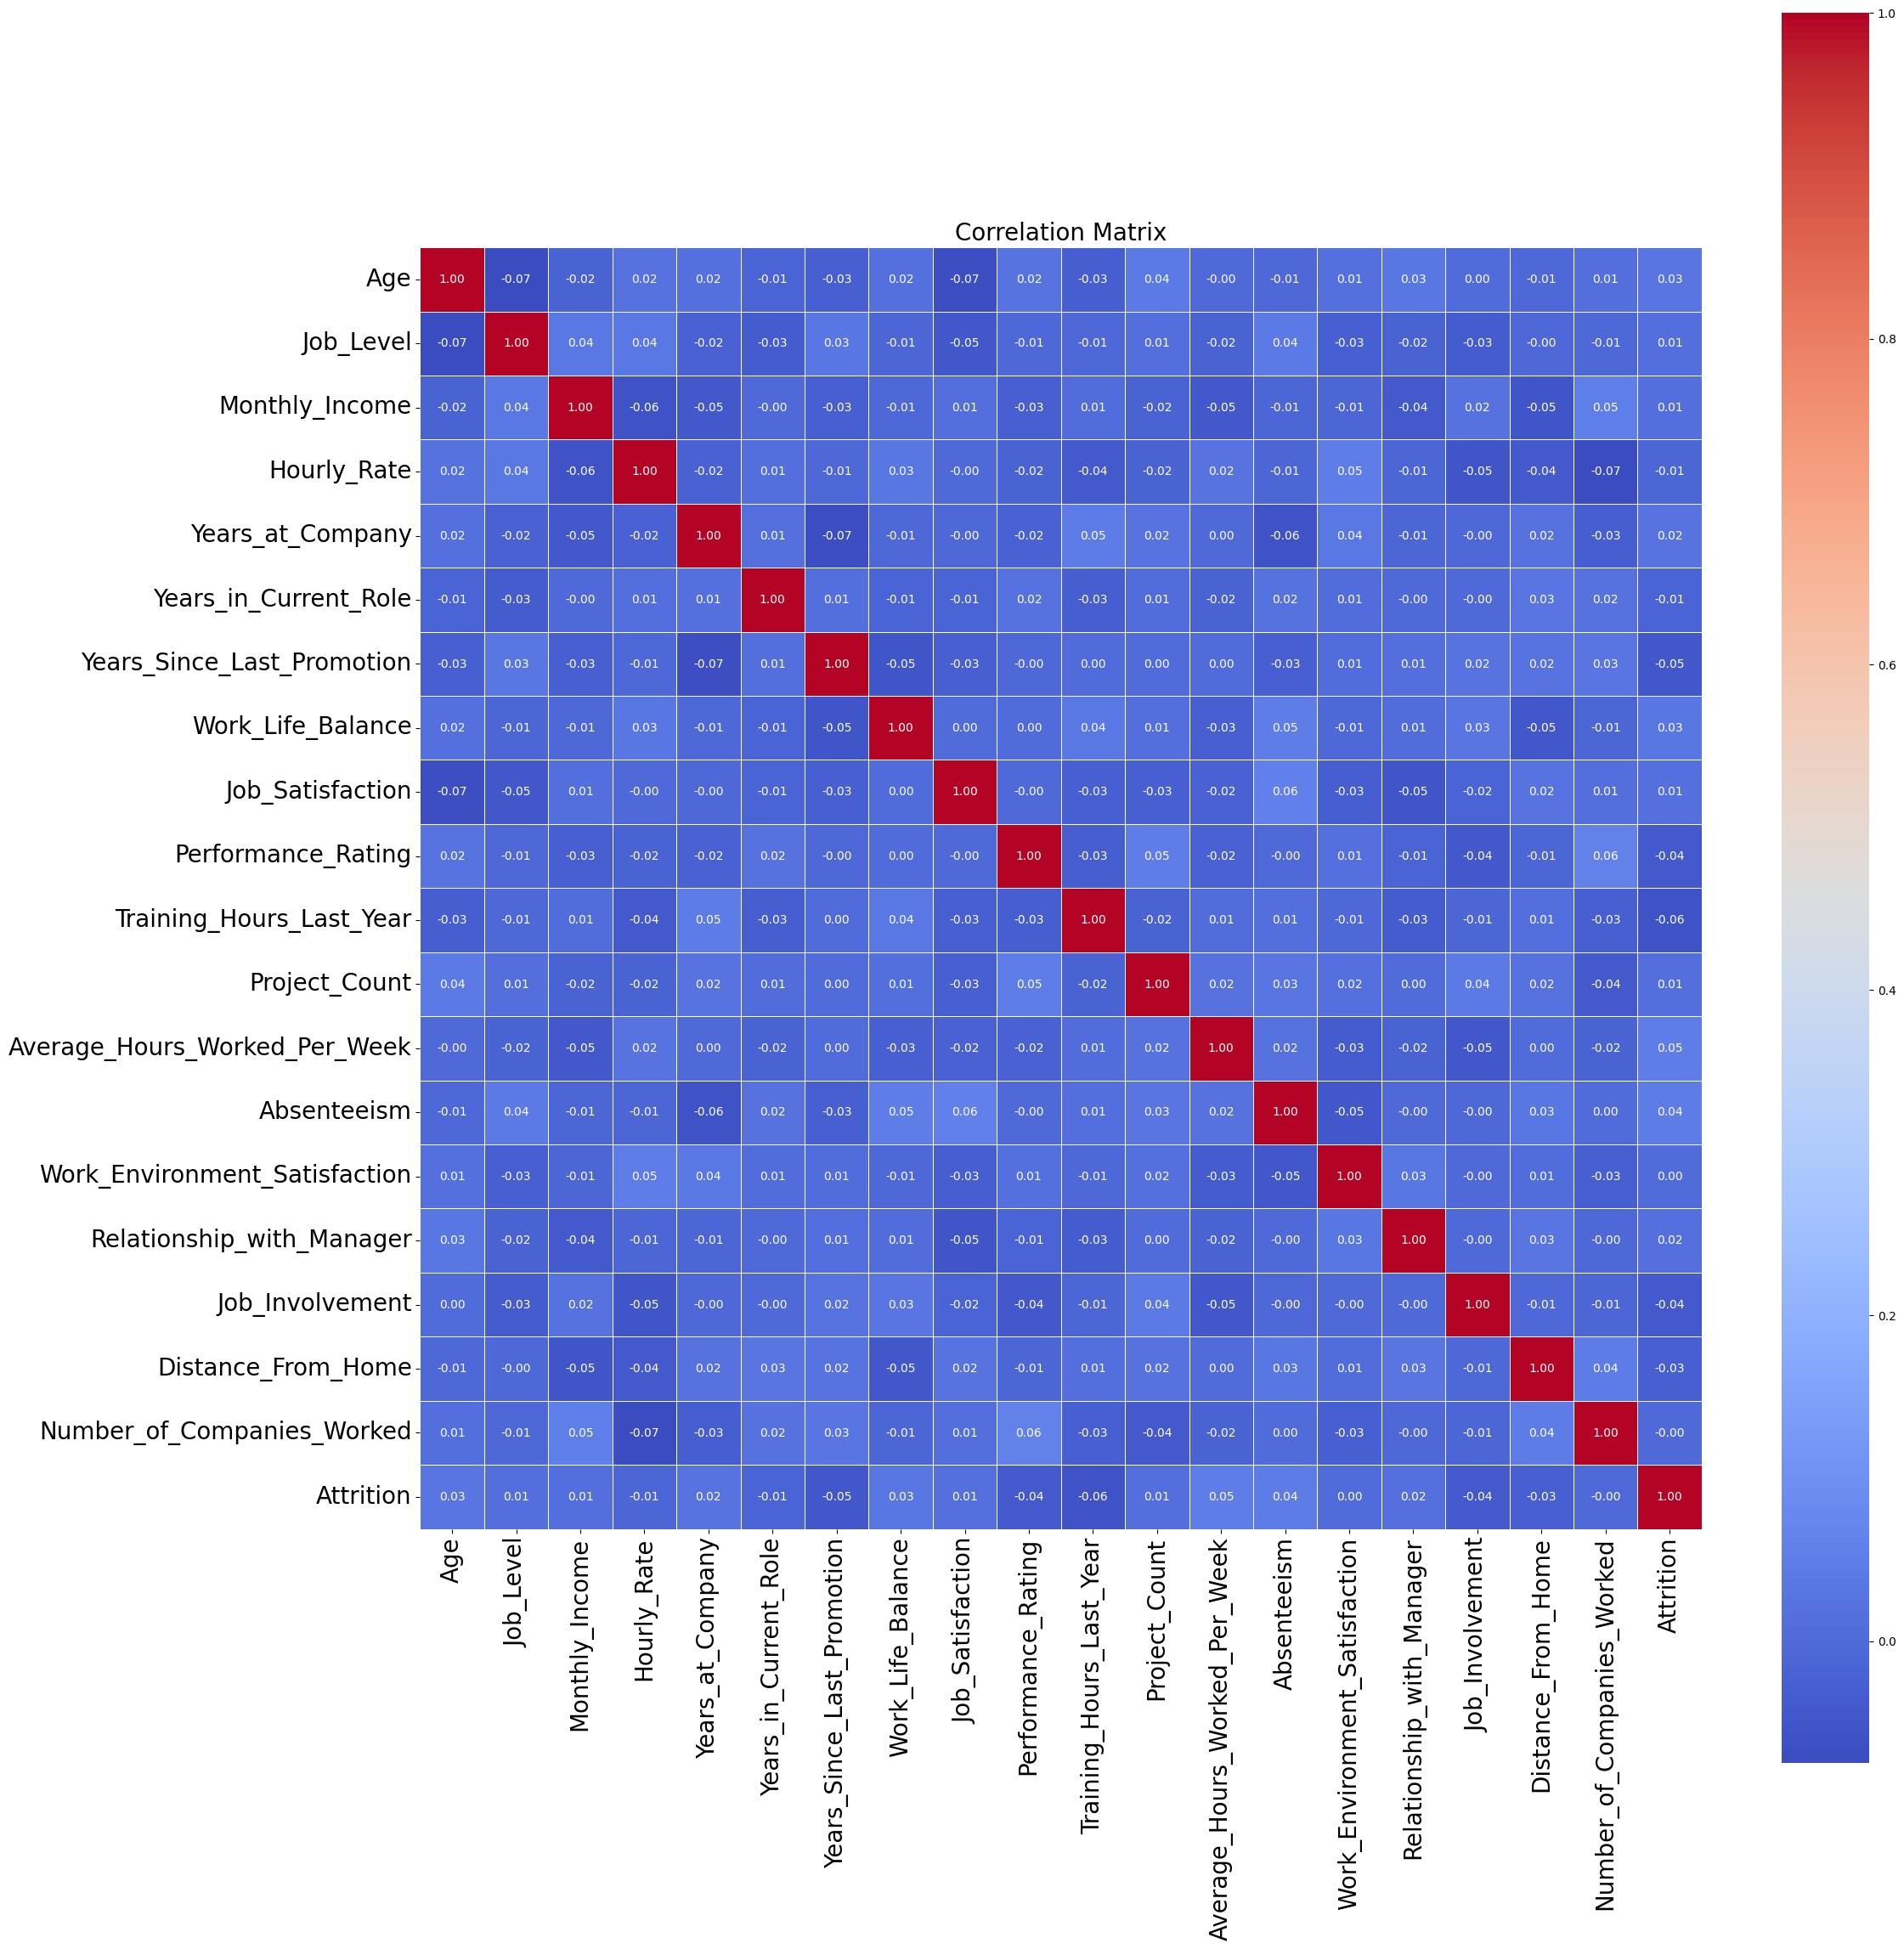

In [27]:
# Filter out non-numerical columns
numerical_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Show correlation values
    cmap="coolwarm",     # Color map
    fmt=".2f",           # Decimal format for values
    linewidths=0.5,      # Add lines between cells
    square=True          # Keep cells square-shaped
)
plt.title("Correlation Matrix", fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.tight_layout()
plt.show()

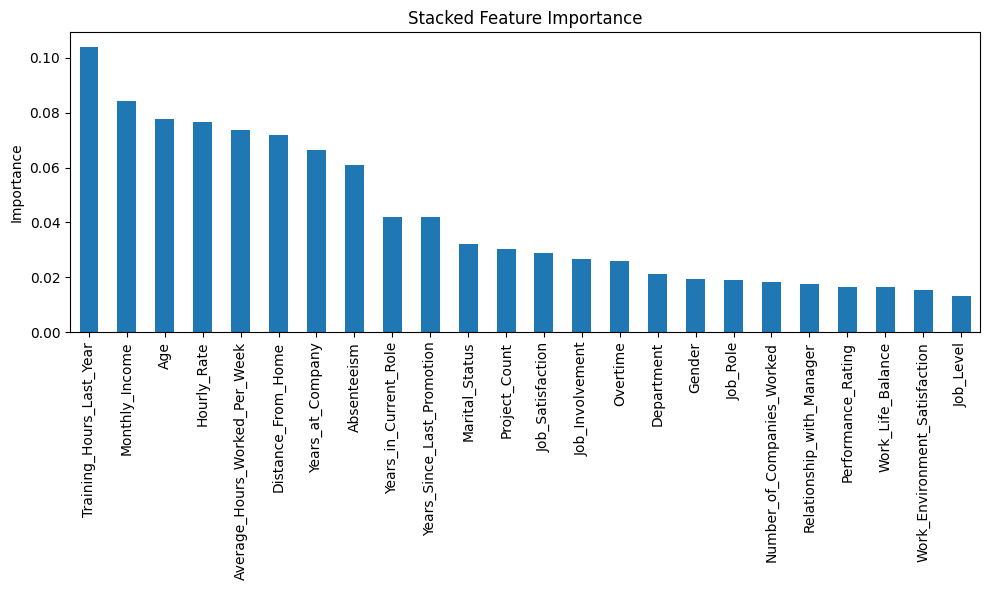

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


RandomForest  Permutation  LogisticRegression  \
Training_Hours_Last_Year           0.082620          NaN            0.098165   
Monthly_Income                     0.074011          NaN            0.047255   
Age                                0.065127          NaN            0.035969   
Hourly_Rate                        0.065891          NaN            0.032780   
Average_Hours_Worked_Per_Week      0.065655          NaN            0.111765   
Distance_From_Home                 0.060699          NaN            0.023697   
Years_at_Company                   0.062479          NaN            0.070608   
Absenteeism                        0.059845          NaN            0.090327   
Years_in_Current_Role              0.051180          NaN            0.048687   
Years_Since_Last_Promotion         0.047207          NaN            0.056389   
Marital_Status                     0.021775          NaN            0.067607   
Project_Count                      0.042699          NaN            0.029455   
Job_Satisfaction                   0.034783          NaN            0.035399   
Job_Involvement                    0.026351          NaN            0.038918   
Overtime                           0.013332          NaN            0.057725   
Department                         0.031747          NaN            0.018159   
Gender                             0.014001          NaN            0.037223   
Job_Role                           0.024526          NaN            0.022566   
Number_of_Companies_Worked         0.023720          NaN            0.020606   
Relationship_with_Manager          0.026542          NaN            0.015362   
Performance_Rating                 0.023448          NaN            0.017868   
Work_Life_Balance                  0.026132          NaN            0.014093   
Work_Environment_Satisfaction      0.028381          NaN            0.005767   
Job_Level                          0.027849          NaN            0.003608   

                                    RFE  MeanImportance  
Training_Hours_Last_Year       0.131618        0.104134  
Monthly_Income                 0.131618        0.084295  
Age                            0.131618        0.077572  
Hourly_Rate                    0.131618        0.076763  
Average_Hours_Worked_Per_Week  0.043873        0.073764  
Distance_From_Home             0.131618        0.072005  
Years_at_Company               0.065809        0.066299  
Absenteeism                    0.032905        0.061025  
Years_in_Current_Role          0.026324        0.042064  
Years_Since_Last_Promotion     0.021936        0.041844  
Marital_Status                 0.007312        0.032231  
Project_Count                  0.018803        0.030319  
Job_Satisfaction               0.016452        0.028878  
Job_Involvement                0.014624        0.026631  
Overtime                       0.006581        0.025879  
Department                     0.013162        0.021023  
Gender                         0.006927        0.019384  
Job_Role                       0.009401        0.018831  
Number_of_Companies_Worked     0.010124        0.018150  
Relationship_with_Manager      0.010968        0.017624  
Performance_Rating             0.007742        0.016353  
Work_Life_Balance              0.008775        0.016333  
Work_Environment_Satisfaction  0.011965        0.015371  
Job_Level                      0.008226        0.013228

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import shap
import matplotlib.pyplot as plt

def stacked_feature_importance(X, y):
    # Train-test split (80-20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 1. Random Forest Feature Importance
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns, name="RandomForest")

    # 2. Permutation Importance
    perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
    perm_importances = pd.Series(perm_importance.importances_mean, index=X_test.columns, name="Permutation")

    # 3. Logistic Regression Coefficients
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    log_reg.fit(X_train, y_train)
    coef_importances = pd.Series(log_reg.coef_[0], index=X_train.columns, name="LogisticRegression").abs()

    # 4. Recursive Feature Elimination (RFE)
    rfe = RFE(estimator=rf, n_features_to_select=5)
    rfe.fit(X_train, y_train)
    rfe_rankings = pd.Series(1 / rfe.ranking_, index=X_train.columns, name="RFE")  # Inverse ranking for better scaling

    # Normalize importances
    rf_importances /= rf_importances.sum()
    perm_importances /= perm_importances.sum()
    coef_importances /= coef_importances.sum()
    rfe_rankings /= rfe_rankings.sum()

    # Combine results
    combined_importances = pd.concat([rf_importances, perm_importances, coef_importances, rfe_rankings], axis=1)
    combined_importances["MeanImportance"] = combined_importances.mean(axis=1)

    # Sort by mean importance
    final_ranking = combined_importances.sort_values(by="MeanImportance", ascending=False)

    # Plot the final ranking
    plt.figure(figsize=(10, 6))
    final_ranking["MeanImportance"].plot(kind="bar", title="Stacked Feature Importance")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

    return final_ranking

stacked_feature_importance(X, y)

In [29]:
# List of required columns for X
required_columns = [
    "Training_Hours_Last_Year",
    "Monthly_Income",
    "Age",
    "Hourly_Rate",
    "Distance_From_Home",
    "Average_Hours_Worked_Per_Week",
    "Years_at_Company",
    "Absenteeism"
]

# Prepare the data
# X, y = prepare_data(df)

    # Train the Random Forest model
best_model, best_params = train_random_forest(X[required_columns], y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Set Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       162
           1       0.00      0.00      0.00        38

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.72       200



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [30]:
X

Age  Gender  Marital_Status  Department  Job_Role  \
Employee_ID                                                           
1            0.839506     0.0             1.0         2.0       3.0   
2            0.345679     0.0             1.0         4.0       1.0   
3           -0.345679     1.0             1.0         3.0       1.0   
4           -0.691358     0.0             0.0         3.0       3.0   
5           -0.049383     1.0             0.0         3.0       2.0   
...               ...     ...             ...         ...       ...   
996         -0.691358     0.0             0.0         1.0       0.0   
997          0.296296     1.0             2.0         2.0       3.0   
998          0.444444     0.0             0.0         2.0       2.0   
999         -0.641975     0.0             1.0         1.0       2.0   
1000         0.345679     0.0             0.0         2.0       0.0   

             Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  \
Employee_ID                                                             
1                 -1.0        0.500281    -0.681818          0.000000   
2                  1.0        0.215504    -0.681818         -0.642857   
3                 -1.0        0.294116    -0.772727          0.642857   
4                 -1.0       -0.525697    -0.727273         -0.357143   
5                 -1.0       -0.124124    -0.136364          1.000000   
...                ...             ...          ...               ...   
996               -0.5       -0.837426     0.409091          0.642857   
997                0.5       -0.029435     0.295455          0.285714   
998               -1.0       -0.781984    -0.340909          0.714286   
999                0.5        1.016520     0.772727         -0.142857   
1000              -0.5        0.056979    -0.431818         -1.000000   

             Years_in_Current_Role  ...  Training_Hours_Last_Year  Overtime  \
Employee_ID                         ...                                       
1                        -0.571429  ...                 -0.730964       0.0   
2                         0.142857  ...                 -0.893401       1.0   
3                         0.857143  ...                  0.548223       1.0   
4                         0.000000  ...                 -0.020305       0.0   
5                         0.285714  ...                  0.284264       0.0   
...                            ...  ...                       ...       ...   
996                       0.857143  ...                  0.527919       0.0   
997                      -0.285714  ...                  0.060914       1.0   
998                       0.571429  ...                 -0.873096       1.0   
999                       0.714286  ...                  0.081218       0.0   
1000                     -1.000000  ...                  0.365482       1.0   

             Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  \
Employee_ID                                                              
1                     0.25                       0.600000     0.727273   
2                    -0.75                       0.000000    -0.727273   
3                     0.25                      -0.733333    -0.636364   
4                     1.00                       0.200000     0.818182   
5                    -0.50                      -0.800000    -0.818182   
...                    ...                            ...          ...   
996                  -0.25                       0.066667     0.090909   
997                   0.50                      -0.600000     0.636364   
998                  -1.00                       0.066667     0.000000   
999                  -0.25                       0.466667     0.727273   
1000                 -0.75                       0.933333    -0.363636   

             Work_Environment_Satisfaction  Relationship_with_Manager  \
Employee_ID                                                             
1      

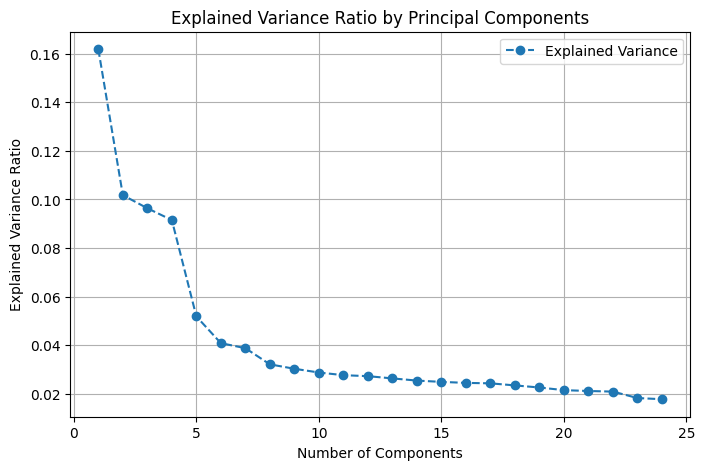

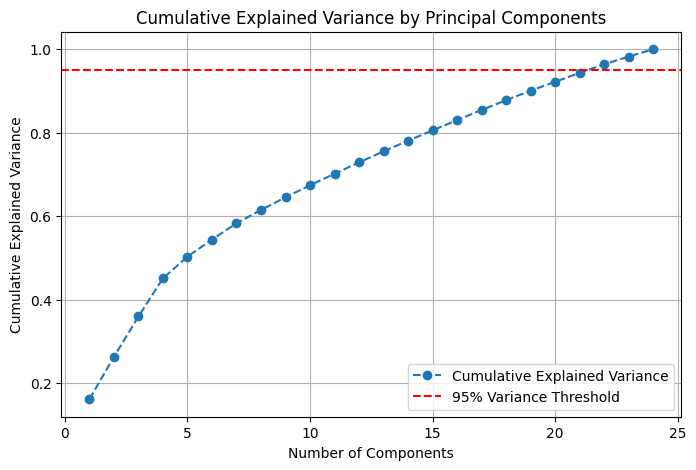

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Scree plot (explained variance ratio)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Explained Variance')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.legend()
plt.show()

# Cumulative explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.legend()
plt.show()

In [32]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# # Step 1: Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA with 20 components
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

# Check the explained variance
explained_variance = sum(pca.explained_variance_ratio_)
print(f"Total Explained Variance for 20 components: {explained_variance:.2f}")

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest with cross-validation
rf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

# Print cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.2f}")


Total Explained Variance for 20 components: 0.92
Cross-validation accuracy scores: [0.8     0.80625 0.8     0.8     0.79375]
Mean CV accuracy: 0.80


In [33]:
X.columns

Index(['Age', 'Gender', 'Marital_Status', 'Department', 'Job_Role',
       'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company',
       'Years_in_Current_Role', 'Years_Since_Last_Promotion',
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Overtime', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object')

In [34]:
df

Age  Gender Marital_Status Department   Job_Role  Job_Level  \
Employee_ID                                                                
1             58  Female        Married         IT    Manager          1   
2             48  Female        Married      Sales  Assistant          5   
3             34    Male        Married  Marketing  Assistant          1   
4             27  Female       Divorced  Marketing    Manager          1   
5             40    Male       Divorced  Marketing  Executive          1   
...          ...     ...            ...        ...        ...        ...   
996           27  Female       Divorced         HR    Analyst          2   
997           47    Male         Single         IT    Manager          4   
998           50  Female       Divorced         IT  Executive          1   
999           28  Female        Married         HR  Executive          4   
1000          48  Female       Divorced         IT    Analyst          2   

             Monthly_Income  Hourly_Rate  Years_at_Company  \
Employee_ID                                                  
1                     15488           28                15   
2                     13079           28                 6   
3                     13744           24                24   
4                      6809           26                10   
5                     10206           52                29   
...                     ...          ...               ...   
996                    4172           76                24   
997                   11007           71                19   
998                    4641           43                25   
999                   19855           92                13   
1000                  11738           39                 1   

             Years_in_Current_Role  ...  Overtime  Project_Count  \
Employee_ID                         ...                            
1                                4  ...        No              6   
2                                9  ...       Yes              2   
3                               14  ...       Yes              6   
4                                8  ...        No              9   
5                               10  ...        No              3   
...                            ...  ...       ...            ...   
996                             14  ...        No              4   
997                              6  ...       Yes              7   
998                             12  ...       Yes              1   
999                             13  ...        No              4   
1000                             1  ...       Yes              2   

             Average_Hours_Worked_Per_Week  Absenteeism  \
Employee_ID                                               
1                                       54           17   
2                                       45            1   
3                                       34            2   
4                                       48           18   
5                                       33            0   
...                                    ...          ...   
996                                     46           10   
997                                     36           16   
998                                     46            9   
999                                     52           17   
1000                                    59            5   

             Work_Environment_Satisfaction Relationship_with_Manager  \
Employee_ID                                                            
1                                        4                         4   
2                                        4                         1   
3                                        3                         4   
4                                        2                         3   
5                                        4                         1   
...                                    ...                  

In [35]:
X

Age  Gender  Marital_Status  Department  Job_Role  \
Employee_ID                                                           
1            0.839506     0.0             1.0         2.0       3.0   
2            0.345679     0.0             1.0         4.0       1.0   
3           -0.345679     1.0             1.0         3.0       1.0   
4           -0.691358     0.0             0.0         3.0       3.0   
5           -0.049383     1.0             0.0         3.0       2.0   
...               ...     ...             ...         ...       ...   
996         -0.691358     0.0             0.0         1.0       0.0   
997          0.296296     1.0             2.0         2.0       3.0   
998          0.444444     0.0             0.0         2.0       2.0   
999         -0.641975     0.0             1.0         1.0       2.0   
1000         0.345679     0.0             0.0         2.0       0.0   

             Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  \
Employee_ID                                                             
1                 -1.0        0.500281    -0.681818          0.000000   
2                  1.0        0.215504    -0.681818         -0.642857   
3                 -1.0        0.294116    -0.772727          0.642857   
4                 -1.0       -0.525697    -0.727273         -0.357143   
5                 -1.0       -0.124124    -0.136364          1.000000   
...                ...             ...          ...               ...   
996               -0.5       -0.837426     0.409091          0.642857   
997                0.5       -0.029435     0.295455          0.285714   
998               -1.0       -0.781984    -0.340909          0.714286   
999                0.5        1.016520     0.772727         -0.142857   
1000              -0.5        0.056979    -0.431818         -1.000000   

             Years_in_Current_Role  ...  Training_Hours_Last_Year  Overtime  \
Employee_ID                         ...                                       
1                        -0.571429  ...                 -0.730964       0.0   
2                         0.142857  ...                 -0.893401       1.0   
3                         0.857143  ...                  0.548223       1.0   
4                         0.000000  ...                 -0.020305       0.0   
5                         0.285714  ...                  0.284264       0.0   
...                            ...  ...                       ...       ...   
996                       0.857143  ...                  0.527919       0.0   
997                      -0.285714  ...                  0.060914       1.0   
998                       0.571429  ...                 -0.873096       1.0   
999                       0.714286  ...                  0.081218       0.0   
1000                     -1.000000  ...                  0.365482       1.0   

             Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  \
Employee_ID                                                              
1                     0.25                       0.600000     0.727273   
2                    -0.75                       0.000000    -0.727273   
3                     0.25                      -0.733333    -0.636364   
4                     1.00                       0.200000     0.818182   
5                    -0.50                      -0.800000    -0.818182   
...                    ...                            ...          ...   
996                  -0.25                       0.066667     0.090909   
997                   0.50                      -0.600000     0.636364   
998                  -1.00                       0.066667     0.000000   
999                  -0.25                       0.466667     0.727273   
1000                 -0.75                       0.933333    -0.363636   

             Work_Environment_Satisfaction  Relationship_with_Manager  \
Employee_ID                                                             
1      

In [37]:
df

Age  Gender Marital_Status Department   Job_Role  Job_Level  \
Employee_ID                                                                
1             58  Female        Married         IT    Manager          1   
2             48  Female        Married      Sales  Assistant          5   
3             34    Male        Married  Marketing  Assistant          1   
4             27  Female       Divorced  Marketing    Manager          1   
5             40    Male       Divorced  Marketing  Executive          1   
...          ...     ...            ...        ...        ...        ...   
996           27  Female       Divorced         HR    Analyst          2   
997           47    Male         Single         IT    Manager          4   
998           50  Female       Divorced         IT  Executive          1   
999           28  Female        Married         HR  Executive          4   
1000          48  Female       Divorced         IT    Analyst          2   

             Monthly_Income  Hourly_Rate  Years_at_Company  \
Employee_ID                                                  
1                     15488           28                15   
2                     13079           28                 6   
3                     13744           24                24   
4                      6809           26                10   
5                     10206           52                29   
...                     ...          ...               ...   
996                    4172           76                24   
997                   11007           71                19   
998                    4641           43                25   
999                   19855           92                13   
1000                  11738           39                 1   

             Years_in_Current_Role  ...  Overtime  Project_Count  \
Employee_ID                         ...                            
1                                4  ...        No              6   
2                                9  ...       Yes              2   
3                               14  ...       Yes              6   
4                                8  ...        No              9   
5                               10  ...        No              3   
...                            ...  ...       ...            ...   
996                             14  ...        No              4   
997                              6  ...       Yes              7   
998                             12  ...       Yes              1   
999                             13  ...        No              4   
1000                             1  ...       Yes              2   

             Average_Hours_Worked_Per_Week  Absenteeism  \
Employee_ID                                               
1                                       54           17   
2                                       45            1   
3                                       34            2   
4                                       48           18   
5                                       33            0   
...                                    ...          ...   
996                                     46           10   
997                                     36           16   
998                                     46            9   
999                                     52           17   
1000                                    59            5   

             Work_Environment_Satisfaction Relationship_with_Manager  \
Employee_ID                                                            
1                                        4                         4   
2                                        4                         1   
3                                        3                         4   
4                                        2                         3   
5                                        4                         1   
...                                    ...                  